In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#CDS function 
def CDS(init_grid,FO,Pe,m):
    #Set length of coefficient matrix for looping
    M = (m+1)**2
    nx = m+1
    #create coefficient matrix of zeroes to start
    A = np.zeros([(m+1)**2,(m+1)**2])
    #counter
    k = 0
#    Pe = 1/Pe
    while k<M-1:
        #set boundary conditions with set values
        if k == 0:
            A[k,k] = 1
        #Southern border    
        elif (k>=1) and (k<=nx):
            A[k,k] = 1
        #northern border    
        elif k > nx*(nx-1):
            A[k,k+1] = -(.5*Pe-1)
            A[k,k-nx] = (.5*Pe-1)
            A[k,k-1] = (.5*Pe-1)
            A[k,k] = (-3)
        #western border
        elif k%nx == 0:
            A[k,k] = 1
        #easter boundary condition    
        elif (k+1)%(nx) == 0:
            A[k,k+nx] = -(.5*Pe-1)
            A[k,k-nx] = (.5*Pe-1)
            A[k,k-1] = (.5*Pe-1)
            A[k,k] = (-3)
        #interior nodes
        else:
            A[k,k+1] = -(.5*Pe-1)
            A[k,k+nx] = -(.5*Pe-1)
            A[k,k-nx] = (.5*Pe-1)
            A[k,k-1] = (.5*Pe-1)
            A[k,k] = (-4)
        k+=1
    A[k,k] = 2*FO
    A[k,k-1] = -FO
    A[k,k-nx] = -FO
    
    coeff_mat = A.copy()
    #flatten original matrix for 'k' references
    known_grid_n = init_grid.copy().flatten()
    #create inverse of A for solving linear algebra equations
    A =(np.linalg.pinv(A))
    
    #solve for unknown matrix B
    solution_grid = np.matmul(A,known_grid_n)
    #reshape final temperatures into mxm grid
    end_grid = solution_grid.copy().reshape([m+1,m+1])
    #reset boundary nodes except insulated boundary
    end_grid[int(.2*m)+1:m+1,0] = 0
    end_grid = np.flipud(end_grid)
    return end_grid,coeff_mat

In [3]:
#Upwind First Order Function
def UDS1(init_grid,FO,Pe,m):
    #Set length of coefficient matrix for looping
    M = (m+1)**2
    nx = m+1
    #create coefficient matrix of zeroes to start
    A = np.zeros([(m+1)**2,(m+1)**2])
    #counter
    k = 0
#    Pe = 1/Pe
    while k<M-1:
        #set boundary conditions with set values
        if k == 0:
            A[k,k] = 1

        #Southern border    
        elif (k>=1) and (k<=nx):
            A[k,k] = 1

        #northern border    
        elif k > nx*(nx-1):
            A[k,k] = 3*FO
            A[k,k-1] = -FO
            A[k,k+1] = -FO
            A[k,k-nx] = -FO

        #western border
        elif k%nx == 0:
            A[k,k] = 1
            
        #eastern boundary condition    
        elif (k+1)%(nx) == 0:
            A[k,k] = 3*FO
            A[k,k-1] = -FO
            A[k,k+nx] = -FO
            A[k,k-nx] = -FO

        #interior nodes
        else:
            A[k,k] = (2*Pe+4)
            A[k,k-1] = -(Pe+1)
            A[k,k+1] = -1
            A[k,k-nx] = -(Pe+1)
            A[k,k+nx] = -1
        k+=1

    A[k,k] = 2*FO
    A[k,k-1] = -FO
    A[k,k-nx] = -FO

    coeff_mat = A.copy()
    #flatten original matrix for 'k' references
    known_grid_n = init_grid.copy().flatten()
    del(init_grid)
    #create inverse of A for solving linear algebra equations
    A =(np.linalg.pinv(A))
    
    #solve for unknown matrix B
    solution_grid = np.matmul(A,known_grid_n)
    #reshape final Phis into mxm grid
    end_grid = solution_grid.copy().reshape([m+1,m+1])
    #reset boundary nodes except insulated boundary
    del(solution_grid)
    end_grid[int(.2*m)+1:m+1,0] = 0
    end_grid = np.flipud(end_grid)
    
    return end_grid,coeff_mat

In [4]:
#Upwind Second Order Function
def UDS2(init_grid,FO,Pe,m):
    #Set length of coefficient matrix for looping
    M = (m+1)**2
    nx = m+1
    #create coefficient matrix of zeroes to start
    A = np.zeros([(m+1)**2,(m+1)**2])
    #counter
    k = 0
    while k<M-1:
        #set boundary conditions with set values
        if k == 0:
            A[k,k] = 1
            
        #Southern border    
        elif (k>=1) and (k<=nx):
            A[k,k] = 1
            
        #northern border    
        elif k > nx*(nx-1):
            A[k,k] = 1
            A[k,k-1] = -1

        #western border
        elif k%nx == 0:
            A[k,k] = 1
            
        #eastern boundary condition    
        elif (k+1)%(nx) == 0:
            A[k,k] = 1
            A[k,k-1] = -1
                    
        #col2
        elif (k-1)%nx==0:
            A[k,k] = (2*Pe+4)
            A[k,k-1] = -(Pe+1)
            A[k,k+1] = -1
            A[k,k-nx] = -(Pe+1)
            A[k,k+nx] = -1
            
        #row2
        elif (k>=nx) & (k<2*nx):
            A[k,k] = (2*Pe+4)
            A[k,k-1] = -(Pe+1)
            A[k,k+1] = -1
            A[k,k-nx] = -(Pe+1)
            A[k,k+nx] = -1

        #interior nodes
        else:
            A[k,k] = 3*Pe+4
            A[k,k-1] = -(2*Pe+1)
            A[k,k-2] = .5*Pe
            A[k,k+1] = -1
            A[k,k-nx] = -(2*Pe+1)
            A[k,k-2*nx] = .5*Pe
            A[k,k+nx] = -1
        k+=1

    A[k,k] = 2*FO
    A[k,k-1] = -FO
    A[k,k-nx] = -FO

    coeff_mat = A.copy()
    #flatten original matrix for 'k' references
    known_grid_n = init_grid.copy().flatten()
    del(init_grid)
    #create inverse of A for solving linear algebra equations
    A =(np.linalg.pinv(A))
    
    #solve for unknown matrix B
    solution_grid = np.matmul(A,known_grid_n)
    #reshape final temperatures into mxm grid
    end_grid = solution_grid.copy().reshape([m+1,m+1])
    del(solution_grid)
    #reset boundary nodes except insulated boundary
    end_grid[int(.2*m)+1:m+1,0] = 0
    end_grid = np.flipud(end_grid)
    
    return end_grid,coeff_mat

In [5]:
#main function
def _main(m,u,alpha,method):
    #intialize the grid with initial Temperature conditions at n=0
    print('Grid size '+str(m)+'x'+str(m))
    initial_grid = np.zeros([m+1,m+1])
    initial_grid[0,1:m+1] = 1
    initial_grid[0:int(.2*m)+1,0] = 1
    initial_grid[int(.2*m)+1:m+1,0] = 0
    
    #Set delx with grid size, assign ystep=xstep to show uniform grid
    x_step = y_step = 1/m
    #Calculate Fourier number (FO)
    FO = alpha/x_step**2
    #Caluclate Peclet number (Pe)
    Pe = u*x_step/alpha
#    print(Pe)
#    Pe = 500
    if method == 'CDS':
        final_grid,coeff_mat = CDS(initial_grid,FO,Pe,m)        
    if method == 'UDS1':
        final_grid,coeff_mat = UDS1(initial_grid,FO,Pe,m)        
    if method == 'UDS2':
        final_grid,coeff_mat = UDS2(initial_grid,FO,Pe,m)        
    
    #make line for cleaner print statements
    print(40*'*'+'\n')
    #return final temperature grid 
    return final_grid, coeff_mat  


In [33]:
#variable setting
alpha_var = 1e-6
u_var = np.sin(0.25*np.pi)
#close any open terminal plots
plt.close('all')
#grid sizes and methods, will loop through these lists
steps = [40,20,10]
methods = ['CDS','UDS1','UDS2']

Grid size 40x40
****************************************

Grid size 40x40
****************************************

Grid size 40x40
****************************************

Grid size 20x20
****************************************

Grid size 20x20
****************************************

Grid size 20x20
****************************************

Grid size 10x10
****************************************

Grid size 10x10
****************************************

Grid size 10x10
****************************************



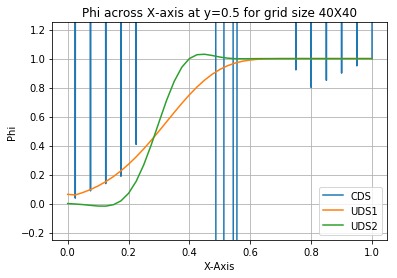

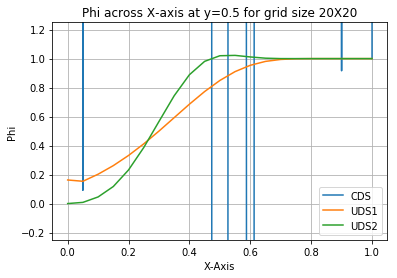

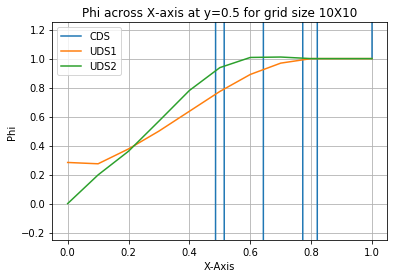

In [34]:
#loop through methods at each grid size, call main function and create plots for each loop
for step in steps:
    #initiate x-axis and y-axis plots
    fig2, ax2 = plt.subplots()
    ax2.set_title('Phi across X-axis at y=0.5 for grid size '+str(step)+'X'+str(step))
    m = step #m is the grid size for both axes
    alpha = alpha_var
    leg = []
    for method in methods:
        leg.append(method)
        u = u_var    
        final_grid, coeff_mat = _main(m,u,alpha,method)
        
        #plot y- axis plots
        ax2.plot(np.linspace(0,1,num=len(final_grid)),final_grid[:,int(step/2)])    
    


    #format plots
    ax2.grid(True)
    ax2.legend(leg)
    ax2.set_xlabel('X-Axis')
    ax2.set_ylabel('Phi')    
    ax2.set_ylim([-.25,1.25])      
    

Text(0.5, 1.05, 'Coefficient Matrix')

<Figure size 432x288 with 0 Axes>

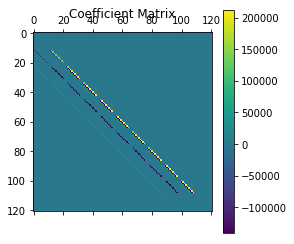

In [37]:
fig2 = plt.figure()
plt.matshow(coeff_mat)
plt.colorbar()
plt.title('Coefficient Matrix')

Text(0.5, 1.05, 'Distribution of Phi')

<Figure size 432x288 with 0 Axes>

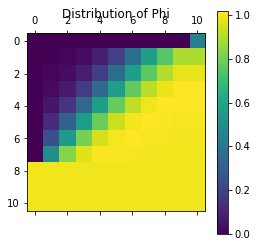

In [38]:
fig3 = plt.figure()
plt.matshow(final_grid)
plt.colorbar()
plt.title('Distribution of Phi')